In [1]:
#https://github.com/manu-mannattil/nolitsa
#nonlinear time series analysis python
#Bibliotecas necessárias para análise e manipulação de dados
import pandas as pd
import numpy as np

#Bibliotecas para plotar os gráficos
from bokeh.plotting import figure, show, output_notebook
pd.set_option('plotting.backend', 'pandas_bokeh')
output_notebook()
import matplotlib.pyplot as plt
from bokeh.layouts import gridplot

#Métricas
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error

#Ignorar avisos de atualização, etc
import warnings
warnings.filterwarnings("ignore")

Loading BokehJS ...

In [56]:
n_pontos = 1000
X = np.linspace(-4*np.pi, 4*np.pi, n_pontos, endpoint=True)
C, S = np.cos(X), np.sin(X)
cos = pd.DataFrame(C)
sin = pd.DataFrame(S)

# Séries Puramente Determinística

In [57]:
cos.plot(kind='scatter', 
         title ="Série Puramente Determinística",
         figsize =(700,500),
         xlabel = "Tempo",
         ylabel="Cosseno",
         size = 3,
        legend=False)

Figure(id='24312', ...)

In [58]:
sin.plot(kind='scatter', 
         title ="Série Puramente Determinística",
         figsize =(700,500),
         xlabel = "Tempo",
         ylabel="Seno",
         size=3,
         legend=False)

Figure(id='25465', ...)

## Teorema de Takens - Analisar a Correlação com os instantes de tempo anteriores

In [59]:
aux = sin.copy() 
aux['x-1'] = sin[0].shift(20)
aux.dropna(axis=0, inplace=True)

p = figure(plot_width=700, 
           plot_height=500, 
           title = 'Espaço Fase com 1 delay',  
           x_axis_label="x-20",
           y_axis_label="x"
          )

# add a circle renderer with a size, color, and alpha
p.circle(aux['x-1'], aux[0], size=3, color="navy", alpha=0.5)

# show the results
show(p)

## Adicionando Ruído

In [60]:
np.random.seed(42)
sigma = 0.5
media = 0
ruido = np.random.normal(media,sigma,n_pontos)
ruido2 = np.random.normal(media,sigma,300)
C_ruido = C + ruido
S_ruido = S + ruido
cos_ruido = pd.DataFrame(C_ruido)
sin_ruido = pd.DataFrame(S_ruido)

In [61]:
df_ruido = pd.DataFrame(ruido2)
df_ruido.plot(kind='scatter',
              title ="Série Puramente Estocástica",
              figsize =(700,500),
              xlabel = "Tempo",
              ylabel="Valor",
              size=6,
              legend=False)

Figure(id='27779', ...)

In [62]:
cos_ruido.plot(kind='scatter',
               figsize =(700,500),
               xlabel = "Tempo",
               ylabel="Cosseno",
               size=5,
               legend=False)

Figure(id='28956', ...)

In [9]:
sin_ruido.plot(kind='scatter',
               figsize =(700,500),
               xlabel = "Tempo",
               ylabel="Seno",
               size=6,
               legend=False)

Figure(id='1576', ...)

# EMD

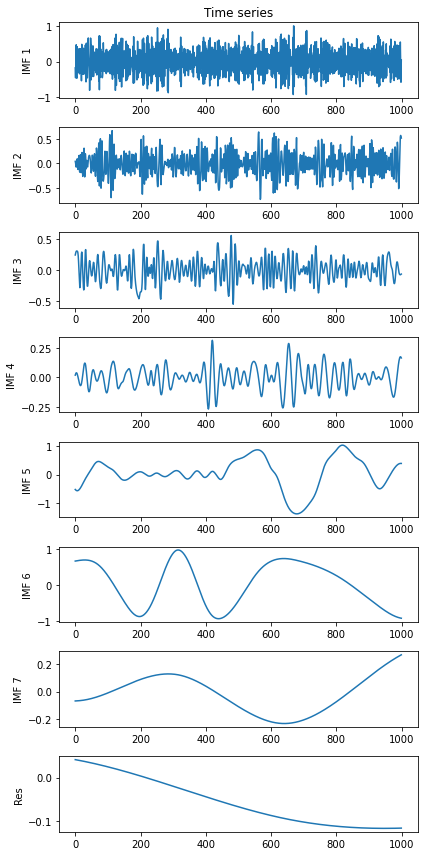

In [63]:
#https://pypi.org/project/EMD-signal/
from PyEMD import EMD, Visualisation
t = np.arange(1000)
emd = EMD()
emd.emd(S_ruido)
imfs, res = emd.get_imfs_and_residue()
vis = Visualisation()
vis.plot_imfs(imfs=imfs, residue=res, t=t, include_residue=True)
vis.show()
imfs = imfs.T
res = res.T

In [64]:

x = list(range(1000))

# create three plots
s1 = figure(background_fill_color="#fafafa",y_axis_label='IMF 1', x_axis_label='Tempo')
s1.circle(x, imfs[:,0], size=5, alpha=0.8, color="#4682B4")

s2 = figure(background_fill_color="#fafafa", y_axis_label='IMF 2', x_axis_label='Tempo')
s2.circle(x, imfs[:,1], size=5, alpha=0.8, color="#4682B4")

s3 = figure(background_fill_color="#fafafa", y_axis_label='IMF 3', x_axis_label='Tempo')
s3.circle(x, imfs[:,2], size=5, alpha=0.8, color="#4682B4")

s4 = figure(background_fill_color="#fafafa", y_axis_label='IMF 4', x_axis_label='Tempo')
s4.circle(x, imfs[:,3], size=5, alpha=0.8, color="#4682B4")

s5 = figure(background_fill_color="#fafafa", y_axis_label='IMF 5', x_axis_label='Tempo')
s5.circle(x, imfs[:,4], size=5, alpha=0.8, color="#4682B4")

s6 = figure(background_fill_color="#fafafa", y_axis_label='IMF 6', x_axis_label='Tempo')
s6.circle(x, imfs[:,5], size=5, alpha=0.8, color="#4682B4")

s7 = figure(background_fill_color="#fafafa", y_axis_label='IMF 7', x_axis_label='Tempo')
s7.circle(x, imfs[:,6], size=5, alpha=0.8, color="#4682B4")

s8 = figure(background_fill_color="#fafafa", y_axis_label='Resíduo', x_axis_label='Tempo')
s8.circle(x, res, size=5, alpha=0.8, color="#4682B4")

# make a grid
grid = gridplot([[s1, s2], [s3, s4], [s5, s6], [s7, s8]], plot_width=450, plot_height=250)

show(grid)


Total de elementos diferentes da original:  1


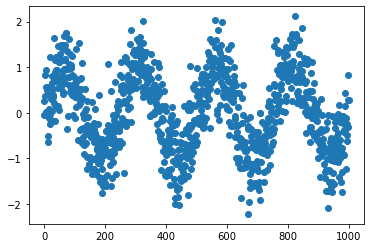

In [65]:
#Teste de reconstrução
#teste = np.copy(imfs[:,0])
teste = np.zeros(1000)
deterministico = np.zeros(1000)
estocastico = np.zeros(1000)
for i in range(0, imfs.shape[1]):
    imf = imfs[:, i]
    teste += imf
teste += res
print('Total de elementos diferentes da original: ', len(S_ruido[teste!=S_ruido]))
plt.scatter(t,teste)

In [66]:
f = deterministico+estocastico
np.mean(S_ruido-f)

0.009666027911162743

# Mutual Information

In [ ]:
#https://pyts.readthedocs.io/en/stable/generated/pyts.transformation.ShapeletTransform.html
#https://github.com/manu-mannattil/nolitsa
#https://pypi.org/project/infoselect/
#http://www.pik-potsdam.de/~donges/pyunicorn/api/climate/mutual_info.html

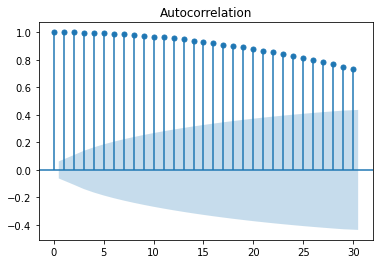

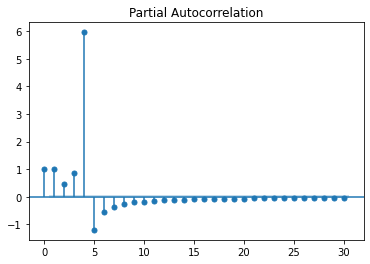

In [67]:
#Autocorrelation function e parcial correlation function
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
plot_acf(S);
plot_pacf(S);

In [68]:
def mi(x, y, bins=16):
    """Calculate the mutual information between two random variables.
    Calculates mutual information, I = S(x) + S(y) - S(x,y), between two
    random variables x and y, where S(x) is the Shannon entropy.
    Parameters
    ----------
    x : array
        First random variable.
    y : array
        Second random variable.
    bins : int
        Number of bins to use while creating the histogram.
    Returns
    -------
    i : float
        Mutual information.
    """
    p_x = np.histogram(x, bins)[0]
    p_y = np.histogram(y, bins)[0]
    p_xy = np.histogram2d(x, y, bins)[0].flatten()

    # Convert frequencies into probabilities.  Also, in the limit
    # p -> 0, p*log(p) is 0.  We need to take out those.
    p_x = p_x[p_x > 0] / np.sum(p_x)
    p_y = p_y[p_y > 0] / np.sum(p_y)
    p_xy = p_xy[p_xy > 0] / np.sum(p_xy)

    # Calculate the corresponding Shannon entropies.
    h_x = np.sum(p_x * np.log2(p_x))
    h_y = np.sum(p_y * np.log2(p_y))
    h_xy = np.sum(p_xy * np.log2(p_xy))

    return h_xy - h_x - h_y


def dmi(x, maxtau=1000, bins=16):
    """Return the time-delayed mutual information of x_i.
    Returns the mutual information between x_i and x_{i + t} (i.e., the
    time-delayed mutual information), up to a t equal to maxtau.  Based
    on the paper by Fraser & Swinney (1986), but uses a much simpler,
    albeit, time-consuming algorithm.
    Parameters
    ----------
    x : array
        1-D real time series of length N.
    maxtau : int, optional (default = min(N, 1000))
        Return the mutual information only up to this time delay.
    bins : int
        Number of bins to use while calculating the histogram.
    Returns
    -------
    ii : array
        Array with the time-delayed mutual information up to maxtau.
    Notes
    -----
    For the purpose of finding the time delay of minimum delayed mutual
    information, the exact number of bins is not very important.
    """
    N = len(x)
    maxtau = min(N, maxtau)

    ii = np.empty(maxtau)
    ii[0] = mi(x, x, bins)

    for tau in range(1, maxtau):
        ii[tau] = mi(x[:-tau], x[tau:], bins)

    return ii

In [69]:
from scipy.integrate import odeint
def lorenz(length=10000, x0=None, sigma=10.0, beta=8.0/3.0, rho=28.0,
           step=0.001, sample=0.03, discard=1000):
    """Generate time series using the Lorenz system.
    Generates time series using the Lorenz system.
    Parameters
    ----------
    length : int, optional (default = 10000)
        Length of the time series to be generated.
    x0 : array, optional (default = random)
        Initial condition for the flow.
    sigma : float, optional (default = 10.0)
        Constant sigma of the Lorenz system.
    beta : float, optional (default = 8.0/3.0)
        Constant beta of the Lorenz system.
    rho : float, optional (default = 28.0)
        Constant rho of the Lorenz system.
    step : float, optional (default = 0.001)
        Approximate step size of integration.
    sample : int, optional (default = 0.03)
        Sampling step of the time series.
    discard : int, optional (default = 1000)
        Number of samples to discard in order to eliminate transients.
    Returns
    -------
    t : array
        The time values at which the points have been sampled.
    x : ndarray, shape (length, 3)
        Array containing points in phase space.
    """
    def _lorenz(x, t):
        return [sigma * (x[1] - x[0]), x[0] * (rho - x[2]) - x[1],
                x[0] * x[1] - beta * x[2]]

    if not x0:
        x0 = (0.0, -0.01, 9.0) + 0.25 * (-1 + 2 * np.random.random(3))

    sample = int(sample / step)
    t = np.linspace(0, (sample * (length + discard)) * step,
                    sample * (length + discard))

    return (t[discard * sample::sample],
            odeint(_lorenz, x0, t)[discard * sample::sample])


def mackey_glass(length=10000, x0=None, a=0.2, b=0.1, c=10.0, tau=23.0,
                 n=1000, sample=0.46, discard=250):
    """Generate time series using the Mackey-Glass equation.
    Generates time series using the discrete approximation of the
    Mackey-Glass delay differential equation described by Grassberger &
    Procaccia (1983).
    Parameters
    ----------
    length : int, optional (default = 10000)
        Length of the time series to be generated.
    x0 : array, optional (default = random)
        Initial condition for the discrete map.  Should be of length n.
    a : float, optional (default = 0.2)
        Constant a in the Mackey-Glass equation.
    b : float, optional (default = 0.1)
        Constant b in the Mackey-Glass equation.
    c : float, optional (default = 10.0)
        Constant c in the Mackey-Glass equation.
    tau : float, optional (default = 23.0)
        Time delay in the Mackey-Glass equation.
    n : int, optional (default = 1000)
        The number of discrete steps into which the interval between
        t and t + tau should be divided.  This results in a time
        step of tau/n and an n + 1 dimensional map.
    sample : float, optional (default = 0.46)
        Sampling step of the time series.  It is useful to pick
        something between tau/100 and tau/10, with tau/sample being
        a factor of n.  This will make sure that there are only whole
        number indices.
    discard : int, optional (default = 250)
        Number of n-steps to discard in order to eliminate transients.
        A total of n*discard steps will be discarded.
    Returns
    -------
    x : array
        Array containing the time series.
    """
    sample = int(n * sample / tau)
    grids = n * discard + sample * length
    x = np.empty(grids)

    if not x0:
        x[:n] = 0.5 + 0.05 * (-1 + 2 * np.random.random(n))
    else:
        x[:n] = x0

    A = (2 * n - b * tau) / (2 * n + b * tau)
    B = a * tau / (2 * n + b * tau)

    for i in range(n - 1, grids - 1):
        x[i + 1] = A * x[i] + B * (x[i - n] / (1 + x[i - n] ** c) +
                                   x[i - n + 1] / (1 + x[i - n + 1] ** c))
    return x[n * discard::sample]

In [70]:
x = lorenz()[1][:, 0]

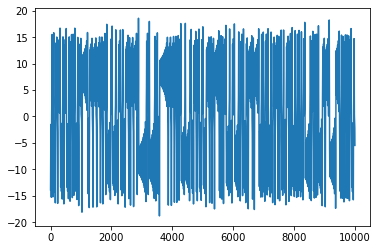

In [71]:
plt.plot(np.arange(len(x)), x)

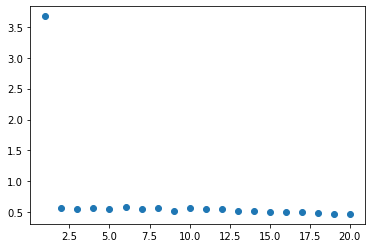

In [72]:
#z = dmi(x, maxtau=50)
#z = dmi(S, maxtau=20)
z = dmi(S_ruido, maxtau=20)
plt.scatter(range(1, len(z)+1), z)

# Embedding Dimension

In [73]:
from nolitsa import dimension

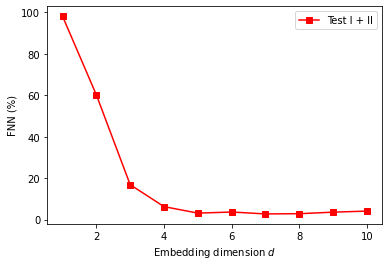

In [74]:
dim = np.arange(1, 10 + 1)

plt.figure(1)
f1, f2, f3 = dimension.fnn(S_ruido, tau=3, dim=dim, window=10, metric='chebyshev')
#plt.title(r'FNN with Chebyshev metric')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'FNN (%)')
plt.plot(dim, 100 * f3, 'rs-', label=r'Test I + II')
plt.legend()

# Transformada de Fourier

In [75]:
from scipy.fft import fft, ifft
imf1 = fft(imfs[:, 0])
imf2 = fft(imfs[:, 1])
imf3 = fft(imfs[:, 2])
imf4 = fft(imfs[:, 3])
imf5 = fft(imfs[:, 4])
imf6 = fft(imfs[:, 5])
imf7 = fft(imfs[:, 6])
resphase = fft(np.array(res))

Text(0.5, 1.0, 'Resíduo')

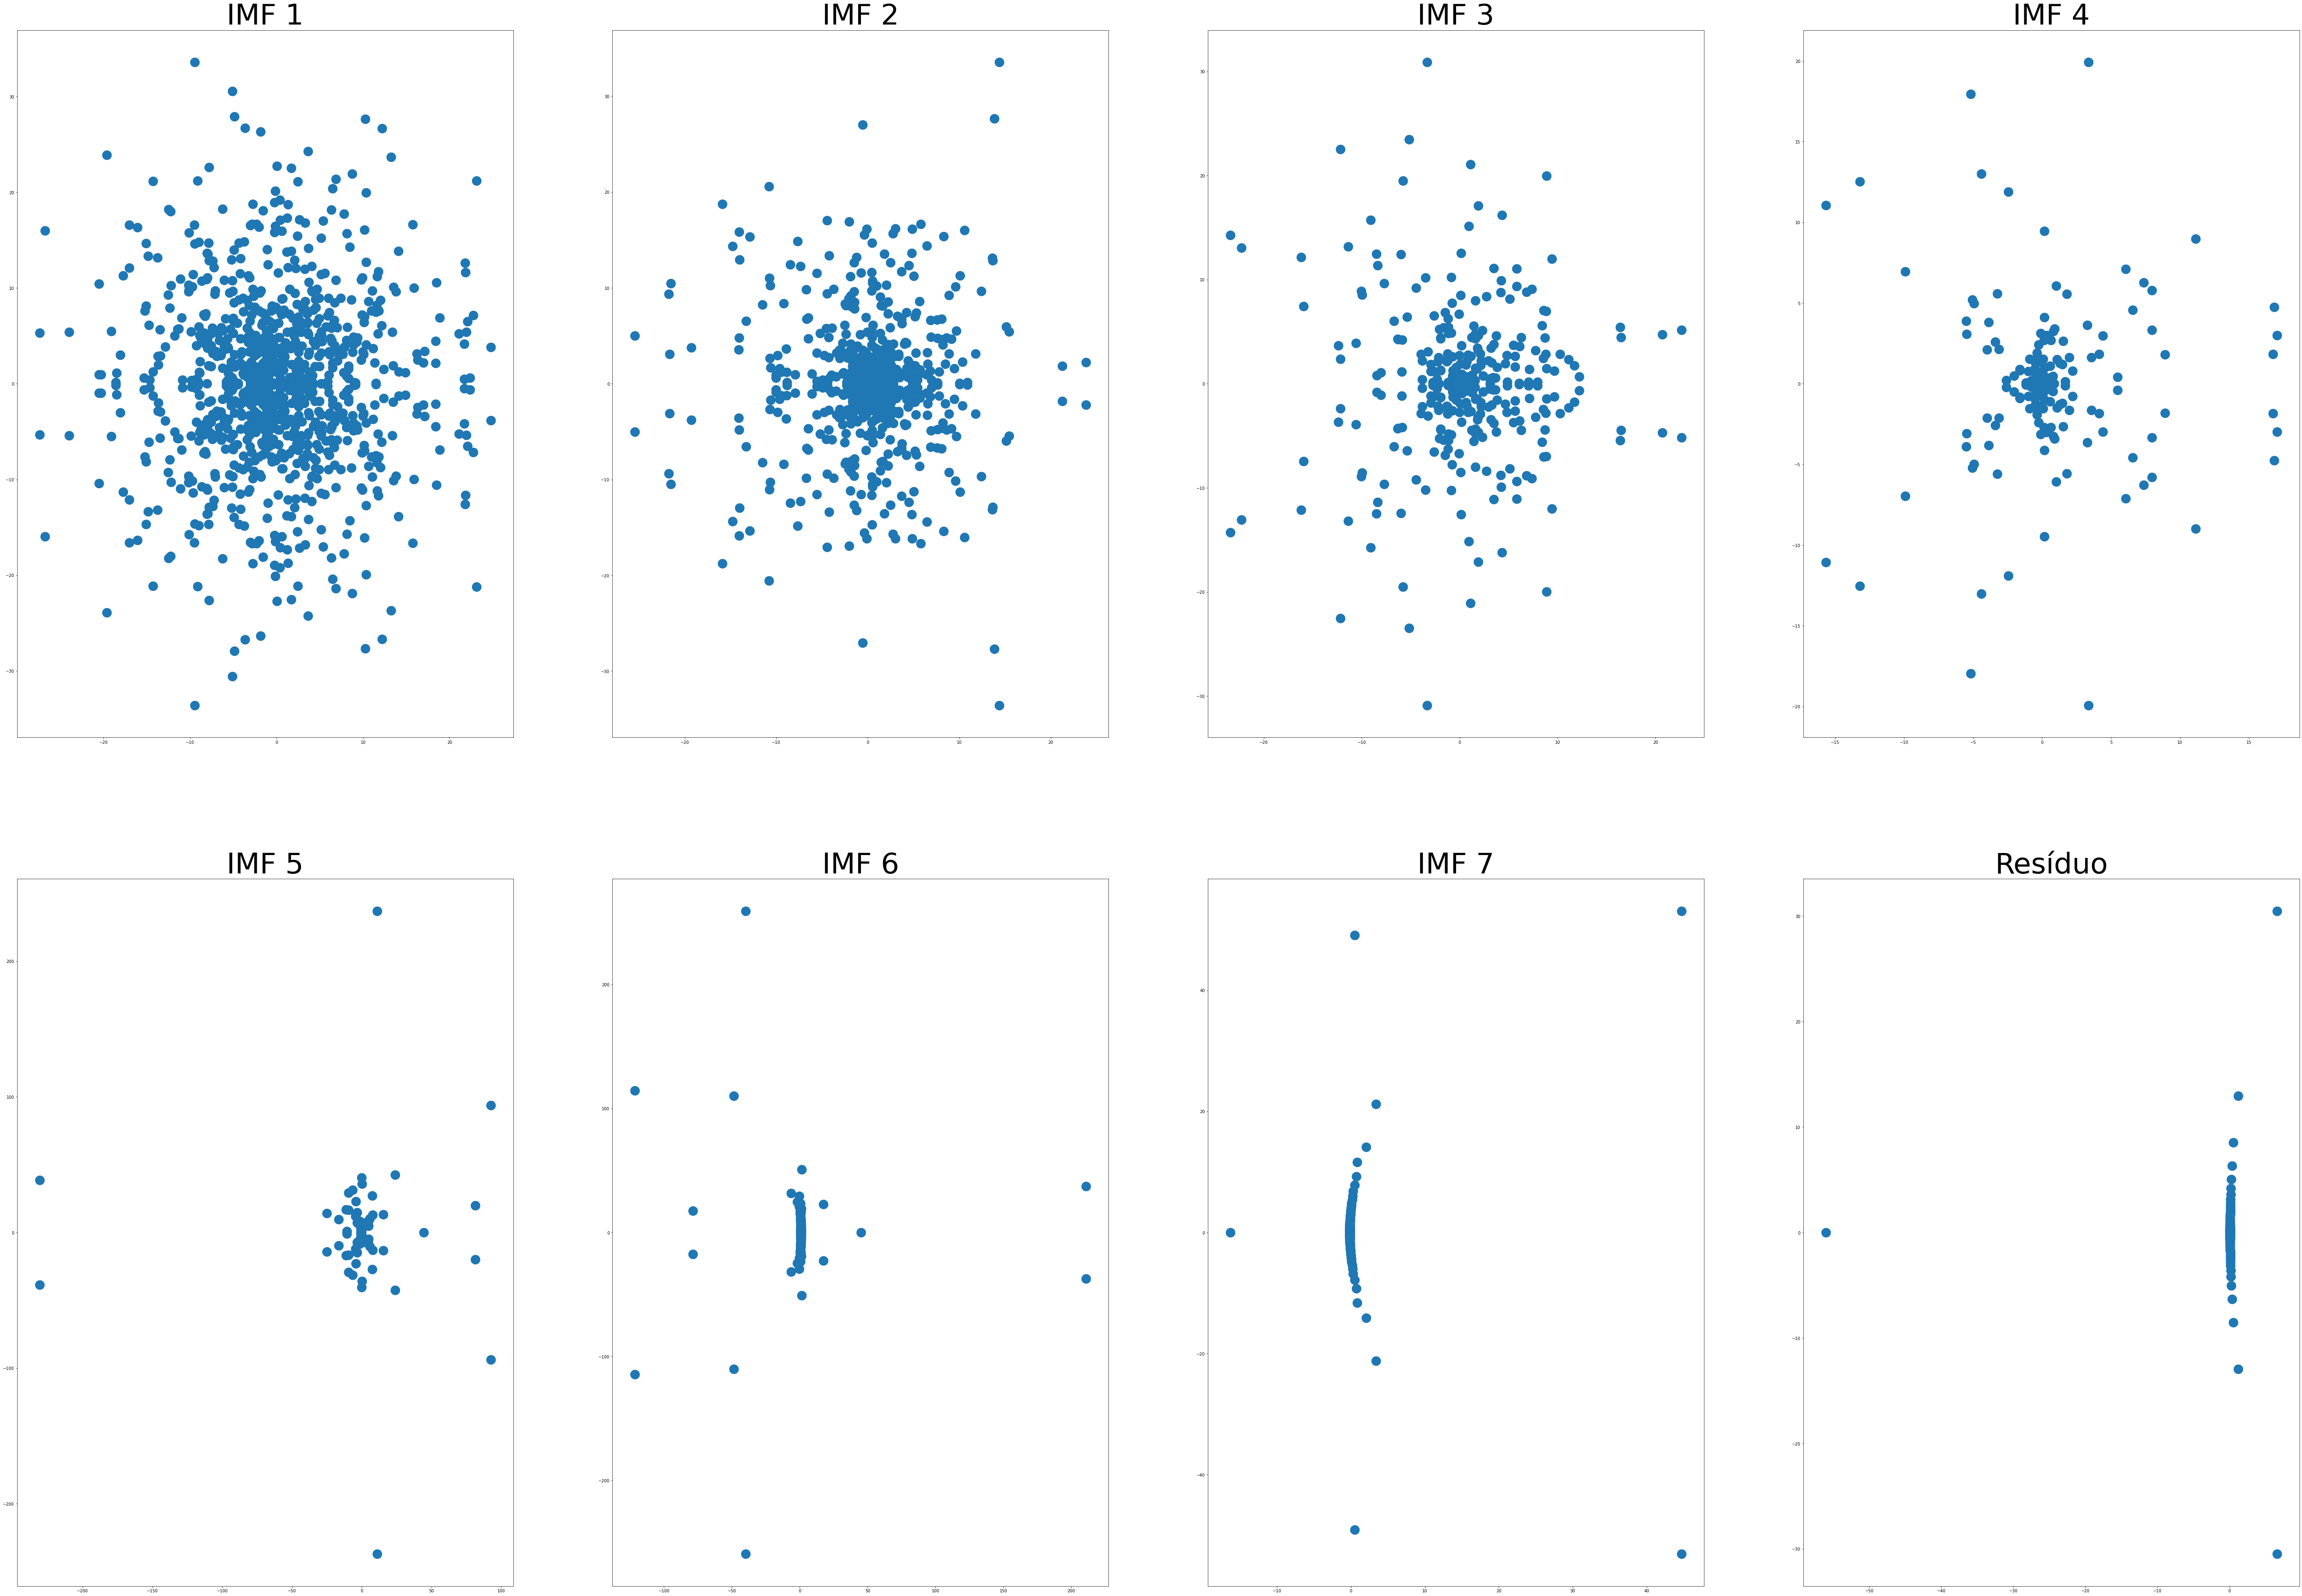

In [86]:
fig, axes = plt.subplots(2,4, figsize = (100,70))
t = range(0,1000)
axes[0,0].scatter(np.real(imf1), np.imag(imf1),s=500)
axes[0,0].set_title('IMF 1', fontsize=70)

axes[0,1].scatter(np.real(imf2), np.imag(imf2),s=500)
axes[0,1].set_title('IMF 2', fontsize=70)

axes[0,2].scatter(np.real(imf3), np.imag(imf3),s=500)
axes[0,2].set_title('IMF 3', fontsize=70)

axes[0,3].scatter(np.real(imf4), np.imag(imf4),s=500)
axes[0,3].set_title('IMF 4', fontsize=70)

axes[1,0].scatter(np.real(imf5), np.imag(imf5),s=500)
axes[1,0].set_title('IMF 5', fontsize=70)

axes[1,1].scatter(np.real(imf6), np.imag(imf6),s=500)
axes[1,1].set_title('IMF 6', fontsize=70)

axes[1,2].scatter(np.real(imf7), np.imag(imf7),s=500)
axes[1,2].set_title('IMF 7', fontsize=70)

axes[1,3].scatter(np.real(resphase), np.imag(resphase),s=500)
axes[1,3].set_title('Resíduo', fontsize=70)

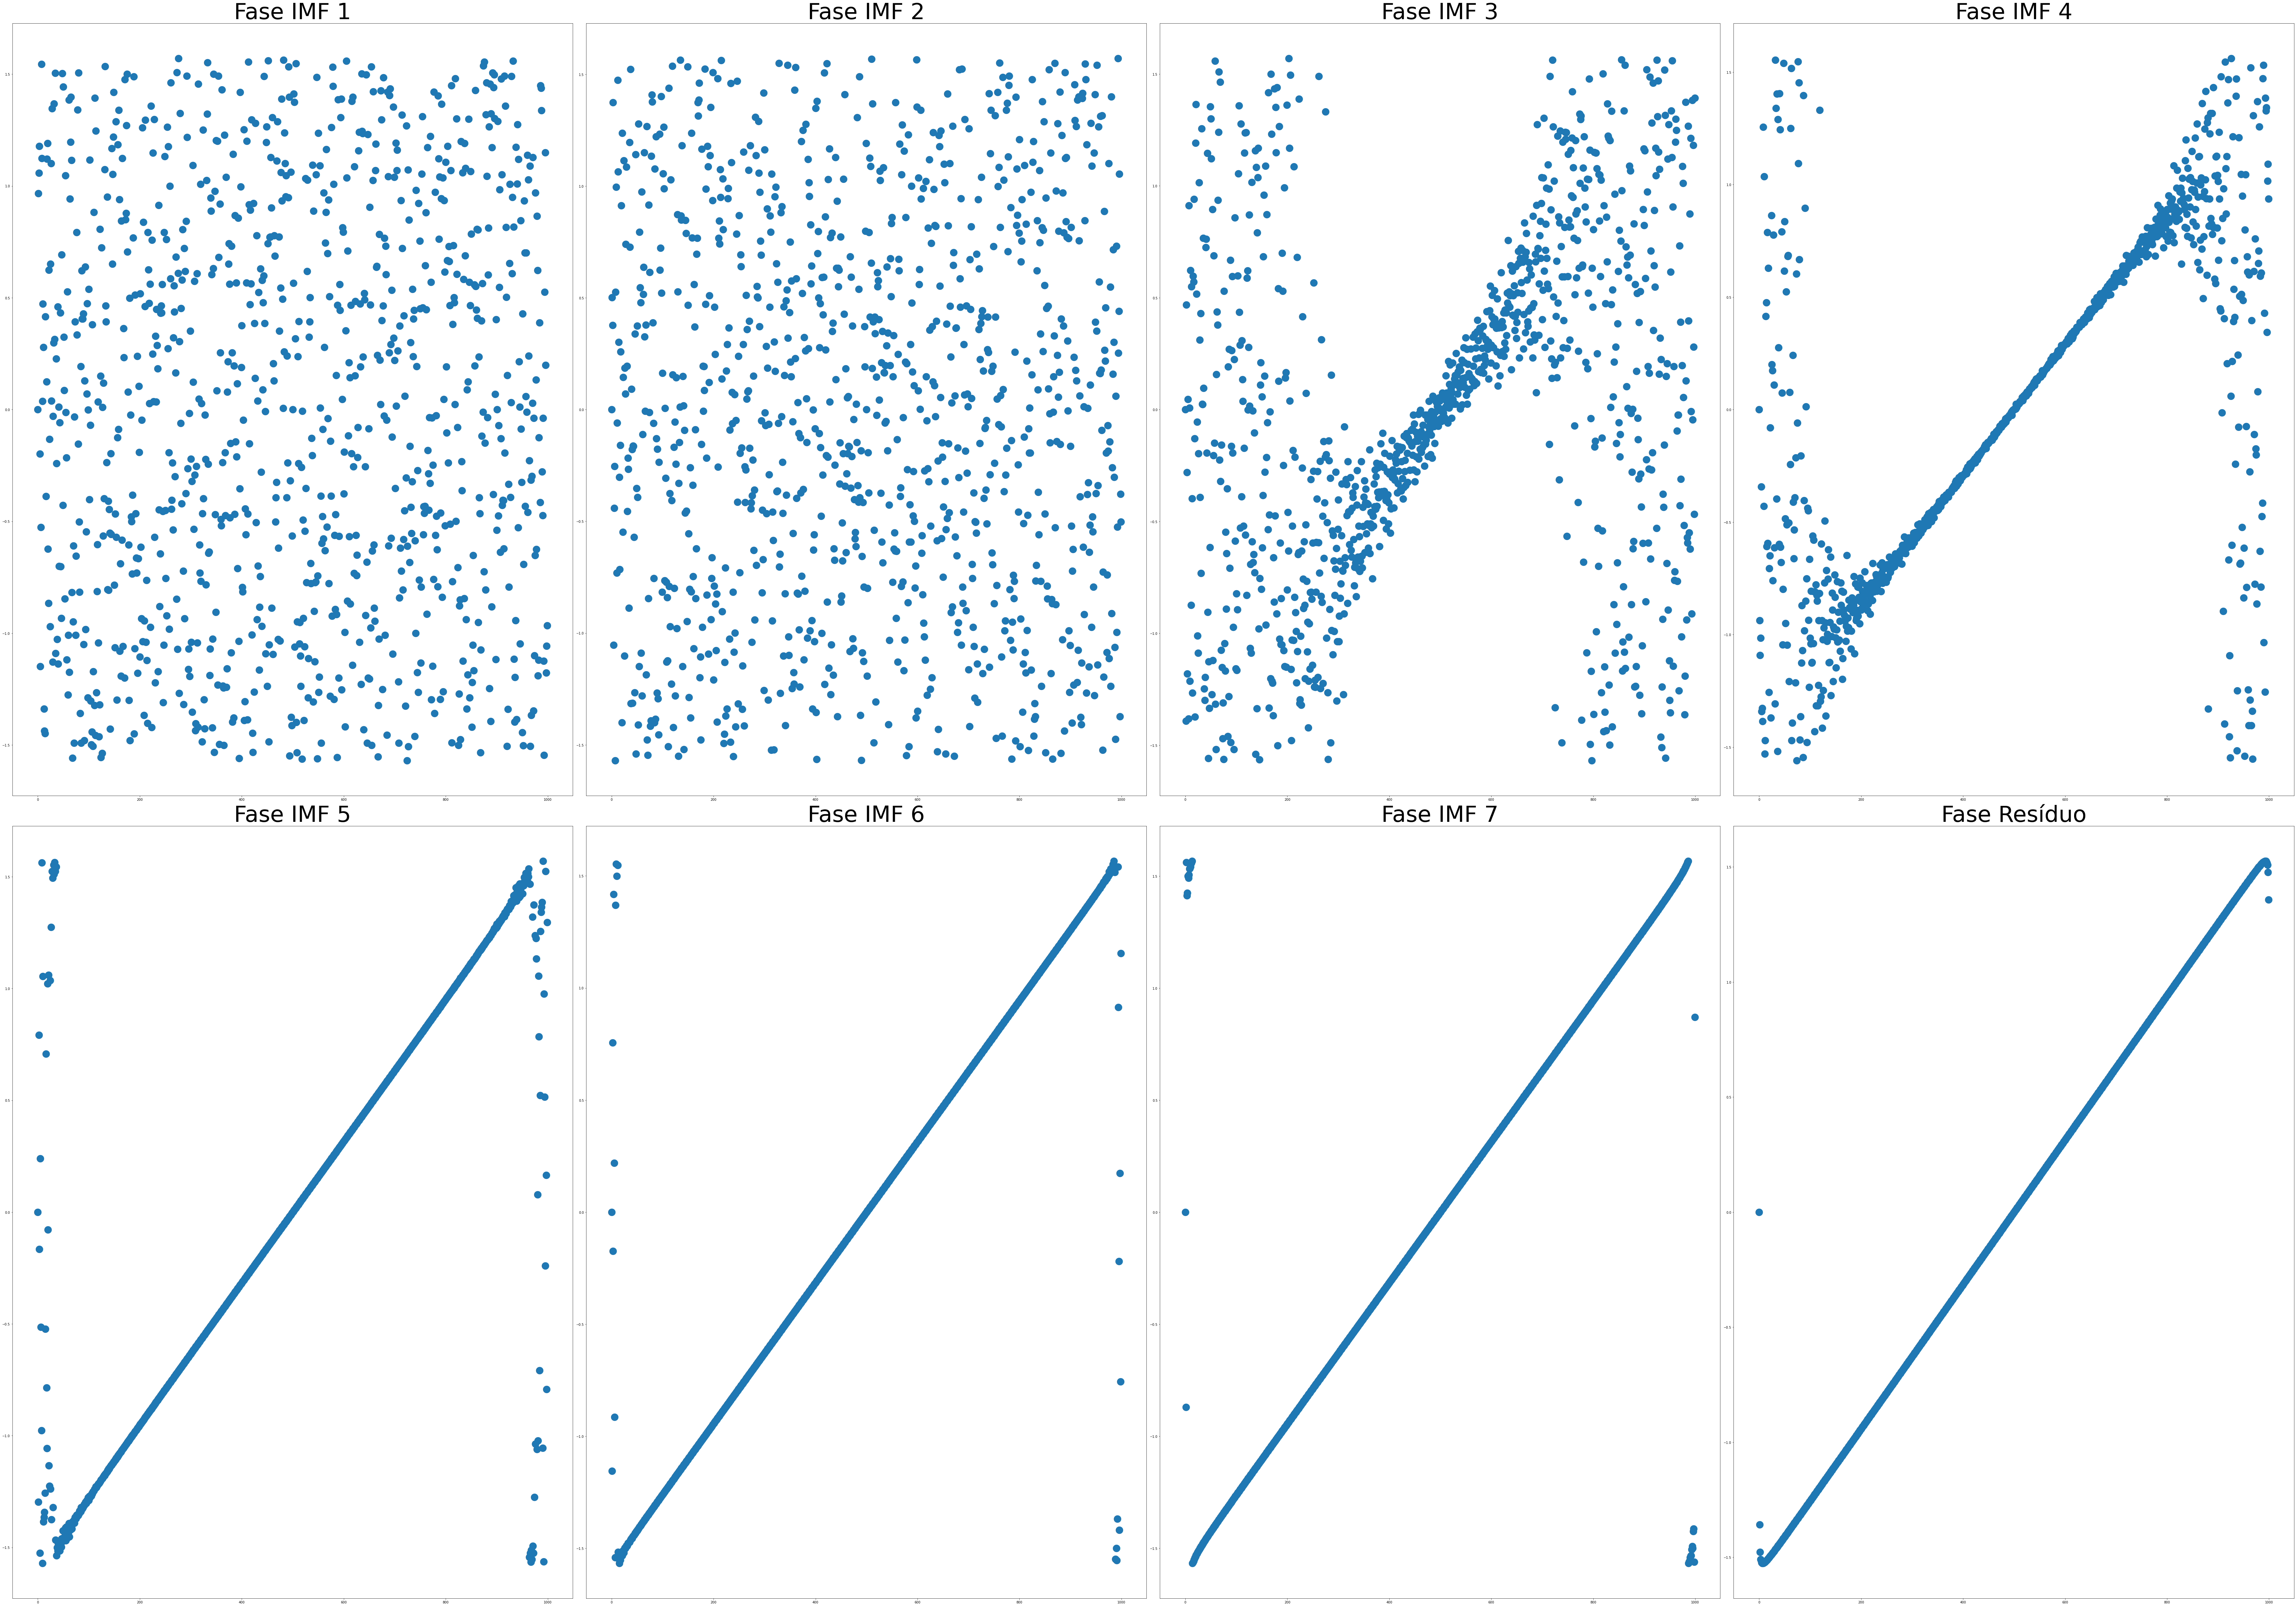

In [91]:
fig, axes = plt.subplots(2,4, figsize = (100,70))
vector_phases = []
t = range(0,1000)
axes[0,0].scatter(t, np.arctan(np.imag(imf1)/np.real(imf1)),s=500)
axes[0,0].set_title('Fase IMF 1', fontsize=70)
vector_phases.append(np.arctan(np.imag(imf1)/np.real(imf1)))

axes[0,1].scatter(t, np.arctan(np.imag(imf2)/np.real(imf2)),s=500)
axes[0,1].set_title('Fase IMF 2', fontsize=70)
vector_phases.append(np.arctan(np.imag(imf2)/np.real(imf2)))

axes[0,2].scatter(t, np.arctan(np.imag(imf3)/np.real(imf3)),s=500)
axes[0,2].set_title('Fase IMF 3', fontsize=70)
vector_phases.append(np.arctan(np.imag(imf3)/np.real(imf3)))

axes[0,3].scatter(t, np.arctan(np.imag(imf4)/np.real(imf4)),s=500)
axes[0,3].set_title('Fase IMF 4', fontsize=70)
vector_phases.append(np.arctan(np.imag(imf4)/np.real(imf4)))

axes[1,0].scatter(t,np.arctan(np.imag(imf5)/np.real(imf5)),s=500)
axes[1,0].set_title('Fase IMF 5', fontsize=70)
vector_phases.append(np.arctan(np.imag(imf5)/np.real(imf5)))

axes[1,1].scatter(t, np.arctan(np.imag(imf6)/np.real(imf6)),s=500)
axes[1,1].set_title('Fase IMF 6', fontsize=70)
vector_phases.append(np.arctan(np.imag(imf6)/np.real(imf6)))

axes[1,2].scatter(t, np.arctan(np.imag(imf7)/np.real(imf7)),s=500)
axes[1,2].set_title('Fase IMF 7', fontsize=70)
vector_phases.append(np.arctan(np.imag(imf7)/np.real(imf7)))

axes[1,3].scatter(t, np.arctan(np.imag(resphase)/np.real(resphase)),s=500)
axes[1,3].set_title('Fase Resíduo', fontsize=70)
vector_phases.append(np.arctan(np.imag(resphase)/np.real(resphase)))

fig.tight_layout()
plt.show()

Fases: 1 e 2
MI: 0.21371889795036614
Corr: -6.46

Fases: 2 e 3
MI: 0.22566011412435927
Corr: -29.45

Fases: 3 e 4
MI: 0.8894317507597655
Corr: 169.59

Fases: 4 e 5
MI: 2.249929093416304
Corr: 423.11

Fases: 5 e 6
MI: 3.5060436872963936
Corr: 666.34

Fases: 6 e 7
MI: 3.8362726774442444
Corr: 774.80

Fases: 7 e 8
MI: 3.531941332287191
Corr: 707.96



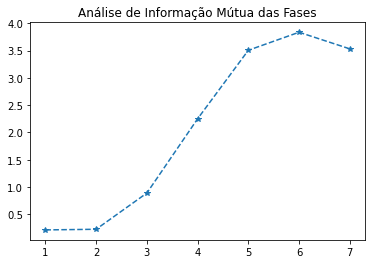

In [113]:
phases_array = np.array(vector_phases).T
mutual_vector = []
for i in range(0, phases_array.shape[1]-1):
    mutual = mi(phases_array[:, i], phases_array[:, i+1])
    mutual_vector.append(mutual)
    print("Fases: {} e {}\nMI: {}\nCorr: {:0.2f}\n".format(i+1, i+2,mutual, np.correlate(phases_array[:, i], phases_array[:, i+1])[0]))

mutual_vector = np.array(mutual_vector)
plt.title('Análise de Informação Mútua das Fases')
plt.plot(range(1, 8), mutual_vector, '--*')

In [95]:
det_start = np.where(mutual_vector>=1)[0][0]
det_start

3

In [105]:
#componente estocástica
estocastico = np.copy(imfs[:, 0])
for i in range(1, det_start):
    estocastico += imfs[:, i]
#Componente Determinística
deterministica = np.copy(imfs[:, det_start])
for i in range(det_start+1, imfs.shape[1]):
    deterministica += imfs[:, i]
deterministica += res
#vai retonar o indice
#det_start = np.where(mutual_vector>=1)[0][0]
#estocastico2 = np.sum(imfs[:, 0:det_start], axis=1)
#deterministico2 = np.sum(imfs[:, 0:det_start], axis=1) + res

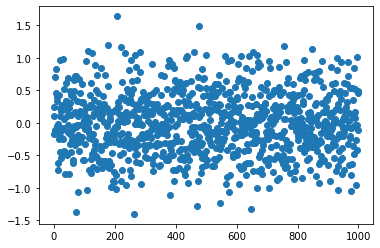

In [106]:
plt.scatter(t, estocastico)

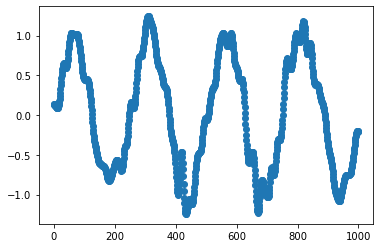

In [107]:
plt.scatter(t,deterministica)

In [87]:
f = estocastico + deterministica
np.mean(S_ruido-f)

-1.7312540290248535e-18

# Modelagem

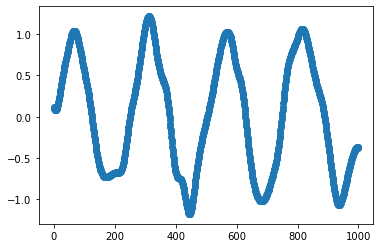

In [97]:
#Componente Determinística
deterministica = np.copy(imfs[:, 4])
for i in range(5, imfs.shape[1]):
    deterministica += imfs[:, i]
deterministica += res
#deterministico = imfs[:, 4] + imfs[:, 5] + imfs[:, 6] + imfs[:, 7]+ res
plt.scatter(t, deterministica)

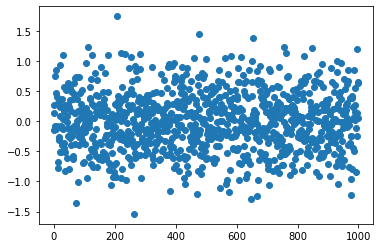

In [98]:
#Componente Estocastica
estocastico = imfs[:, 0] + imfs[:, 1] + imfs[:, 2] + imfs[:, 3]
plt.scatter(t, estocastico)

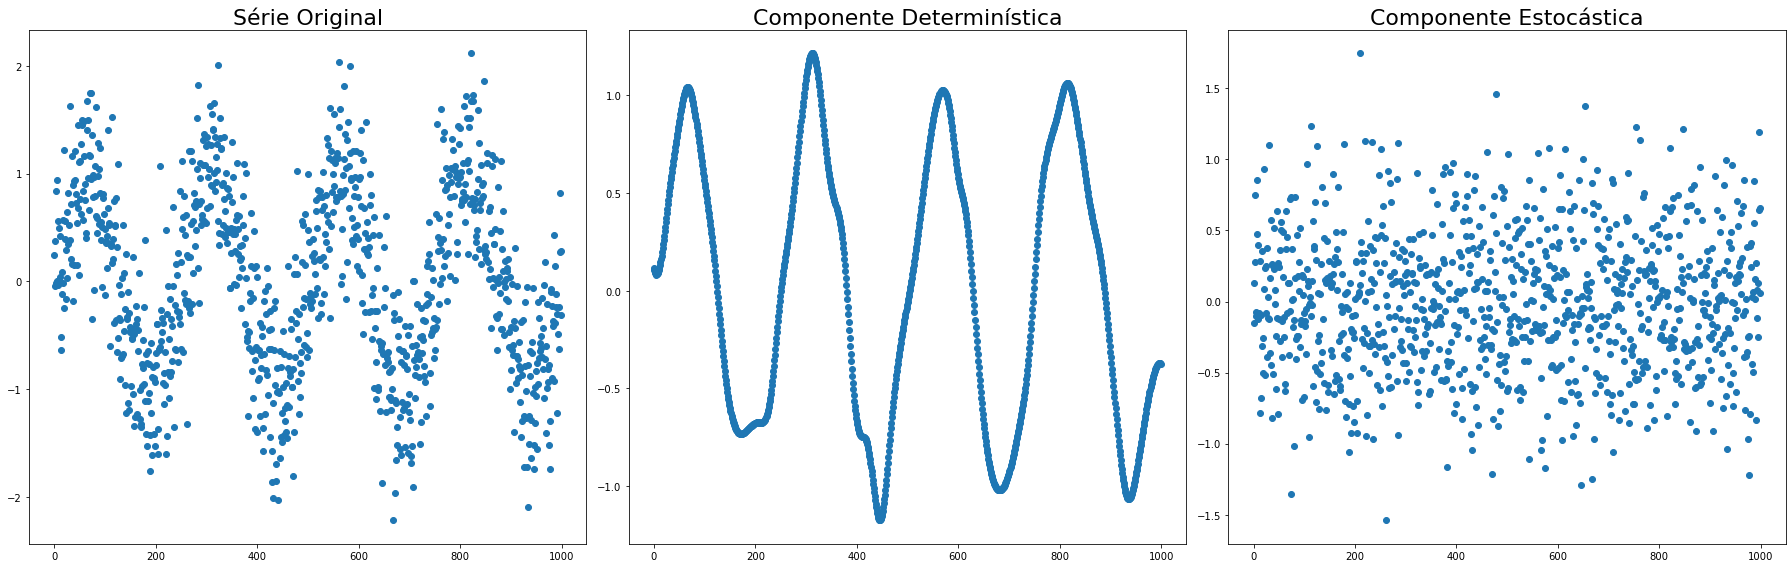

In [109]:
fig, axes = plt.subplots(1,3, figsize = (25,8))
#x = np.arange(1,11)
t=range(1000)
axes[0].scatter(t,S_ruido)
axes[0].set_title('Série Original', fontsize=22)
axes[1].scatter(t, deterministica)
axes[1].set_title('Componente Determinística', fontsize=22)
axes[2].scatter(t, estocastico)
axes[2].set_title('Componente Estocástica', fontsize=22)
fig.tight_layout()
plt.show()

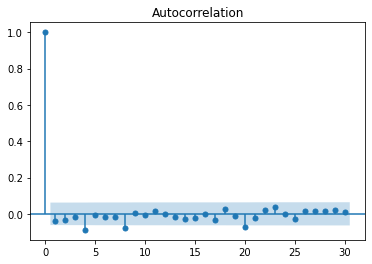

In [117]:
plot_acf(estocastico);

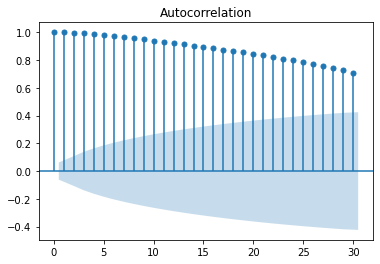

In [102]:
plot_acf(deterministica);

## Criação dos Modelos

### Modelagem da Componente Determinística

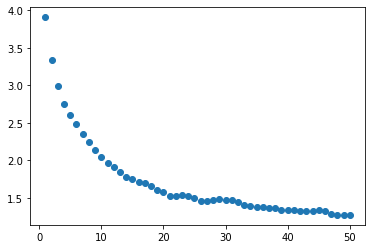

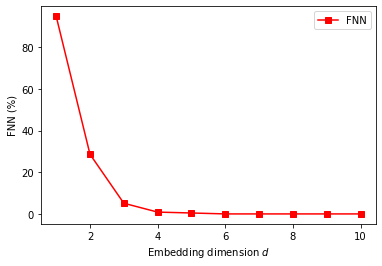

In [390]:
from scipy.signal import argrelextrema
df_deterministica = np.copy(deterministica)
#Definir os parâmetros de Takens
#Delay
z = dmi(df_deterministica, maxtau=50)
plt.scatter(range(1, len(z)+1), z)
delay = argrelextrema(z, np.less)[0][0]
#Dimension
dim = np.arange(1, 10 + 1)

plt.figure(2)
f1, f2, f3 = dimension.fnn(df_deterministica, tau=delay, dim=dim, window=10, metric='chebyshev')
dimensao = np.where(f3 <= 0.2)[0][0] + 1
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'FNN (%)')
plt.plot(dim, 100 * f3, 'rs-', label='FNN')
plt.legend()

In [511]:
#Criando o DataFrame deterministico
df_deterministica = pd.DataFrame(df_deterministica)
df_deterministica.rename(columns={0: 't'}, inplace =True)
for i in range(1, dimensao+1):
    texto = "t-{}".format(i*delay)
    df_deterministica[texto]= df_deterministica['t'].shift(i*delay)
df_deterministica.dropna(axis=0,inplace=True)
#df_deterministica[41:].head(50)

In [376]:
porcentagem = 0.7
indice = int(df_deterministica.shape[0]*porcentagem)
train = df_deterministica.iloc[0:indice, :].copy()
x_train = train.drop(columns='t').copy()
y_train = train['t'].copy()
test  = df_deterministica.iloc[indice:, :].copy()
x_test = test.drop(columns='t').copy()
y_test = test['t'].copy()

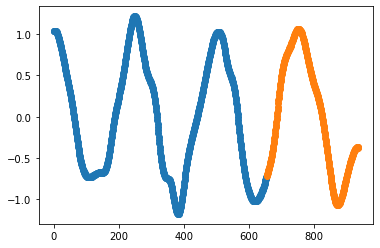

In [377]:
plt.figure(1)
plt.scatter(np.arange(indice), y_train)
plt.scatter(range(indice,(indice+len(y_test))), y_test)

In [378]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=42)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

RMSE: 0.18459546762500184


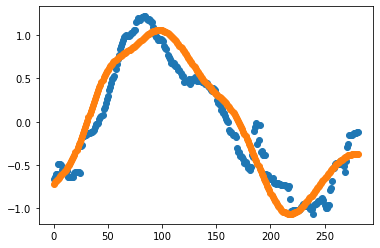

In [379]:
prediction = xgb.predict(x_test)
plt.figure(1)
plt.scatter(range(len(prediction)), prediction)
plt.scatter(range(len(prediction)), y_test)
print("RMSE: {}".format(median_absolute_error(y_test, prediction)))

In [380]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

RMSE: 0.16391193404350143


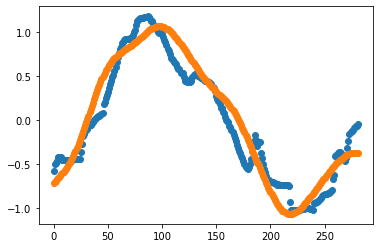

In [381]:
prediction = model.predict(x_test)
plt.figure(1)
plt.scatter(range(len(prediction)), prediction)
plt.scatter(range(len(prediction)), y_test)
print("RMSE: {}".format(median_absolute_error(y_test, prediction)))

In [578]:
#Prever 300 pontos
fim = x_train.tail(1).index[0]
predito = []
buffer = deterministico[0:x_train.tail(1).index[0]]
for i in range(1,len(y_test)+1):
    elemento = buffer[[fim+i-delay, fim+i-2*delay, fim+i-3*delay]].reshape(1, 3)
    predict = model.predict(elemento)
    predito.append(predict)
    buffer = np.insert(buffer, len(buffer), predict)
    

RMSE Random Forest: 0.12404818430274328


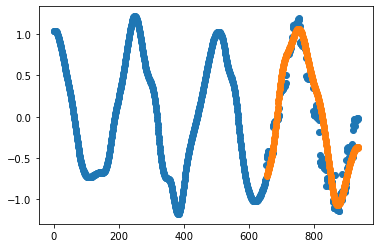

In [582]:
plt.figure(1)
plt.scatter(range(buffer[63:].shape[0]), buffer[63:])
#plt.scatter(range(y_train.shape[0]), y_train)
plt.scatter(range(y_train.shape[0], y_train.shape[0] + y_test.shape[0]), y_test, label='teste')
print("RMSE Random Forest: {}".format(median_absolute_error(y_test, predito)))
#plt.scatter(range(df_deterministica.shape[0]), df_deterministica['t'])

### Modelagem da Componente Estocástica

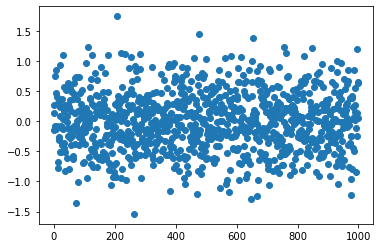

In [583]:
plt.scatter(range(len(estocastico)),estocastico)

In [594]:
indice_estocastico = int(estocastico.shape[0]*0.7)
train = estocastico[0:indice_estocastico]
test = estocastico[indice_estocastico:]

In [592]:
from pmdarima.arima import auto_arima

In [613]:
arima = auto_arima(train, trace=True, stepwise = False, seasonal=False, stationary=True)

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=979.108, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=979.541, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=979.647, Time=0.13 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=981.480, Time=0.11 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=970.442, Time=0.18 sec
 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=972.440, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=979.684, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=971.042, Time=0.37 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=972.951, Time=0.43 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=974.908, Time=0.58 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=972.438, Time=0.37 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=980.199, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=972.949, Time=0.54 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=971.674, Time=0.34 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=973.310, Time=0.73 sec
 ARIMA(3,0,0)(0,0,0)[0] i

In [614]:
arima.fit(train)

ARIMA(order=(0, 0, 4), scoring_args={}, suppress_warnings=True)

In [629]:
future_forecast = arima.predict(n_periods=299)

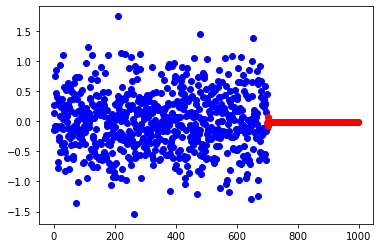

In [660]:
plt.scatter(range(700), train, c='b')
plt.scatter(range(700,999), future_forecast, c='r')

# Resultados

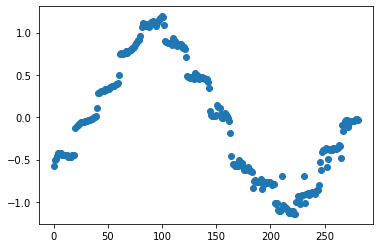

In [647]:
plt.scatter(range(len(buffer[x_train.tail(1).index[0]:])),buffer[x_train.tail(1).index[0]:])

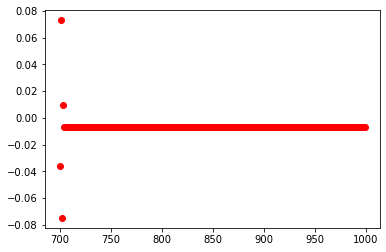

In [620]:
plt.scatter(range(700,1000), future_forecast, c='r')

In [654]:
final = np.zeros(299)
final += buffer[700:] 
final += future_forecast

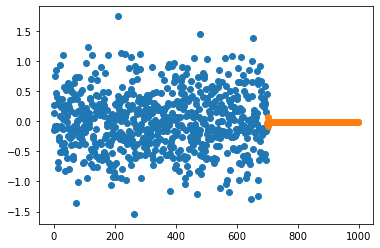

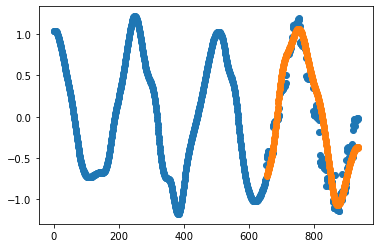

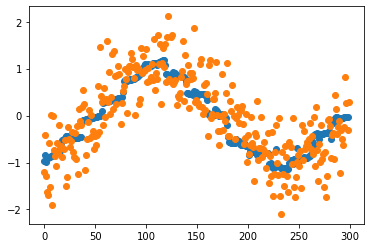

In [662]:
plt.figure(1)
plt.scatter(range(700), train)
plt.scatter(range(700,999), future_forecast)
plt.figure(2)
plt.scatter(range(buffer[63:].shape[0]), buffer[63:])
plt.scatter(range(y_train.shape[0], y_train.shape[0] + y_test.shape[0]), y_test, label='teste')
plt.figure(3)
plt.scatter(np.arange(len(final)), final)
plt.scatter(range(300),S_ruido[700:])


In [ ]:
fig, axes = plt.subplots(1,3, figsize = (20,6))
x = np.arange(1,11)
plt.scatter(range(len(buffer[x_train.tail(1).index[0]:])),buffer[x_train.tail(1).index[0]:])
axes[0].set_title('Previsão Componente Determinística')
axes[1].scatter(t, deterministica)
axes[1].set_title('Previsão Componente Estocástica')
axes[2].scatter(t, estocastico)
axes[2].set_title('Previsão Componente Estocástica + Determinística')
fig.tight_layout()
plt.show()

In [672]:
import math
rmse = math.sqrt(mean_squared_error(S_ruido[701:], final))
MAPE = np.mean(np.abs((S_ruido[701:] - final) / S_ruido[701:])) * 100
MAE = mean_absolute_error(S_ruido[701:], final)
print("RMSE: {:0.3f}\nMAPE: {:0.3f}\nMAE: {:0.3f}".format(rmse, MAPE, MAE))

RMSE: 0.514
MAPE: 21483.433
MAE: 0.412
